# Multicollinearity of Features - Lab

## Introduction

In this lab, you'll identify multicollinearity in the Ames Housing dataset.

## Objectives

You will be able to:

* Create a scatter matrix and correlation matrix
* Assess and interpret the output of a correlation matrix
* Identify if variables are exhibiting collinearity
* Decide how to address the collinearity in the data set

## Correlation matrix for the Ames Housing data

### Import data

Let's reimport the Ames Housing data assign the numeric variables we want to keep to `numeric_vars`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

ames = pd.read_csv('ames.csv')

numeric_vars = ['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea',
                'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                'ScreenPorch', 'PoolArea']

### Create processed
Create a new dataframe named `ames_preprocessed` that contains only the features in `numeric_vars`.

In [3]:
# create single dataframe called ames_preprocessed
ames_preprocessed = ames[numeric_vars]
ames_preprocessed

,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,65.0,8450,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0
1,80.0,9600,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0
2,68.0,11250,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0
3,60.0,9550,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0
4,84.0,14260,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0
1456,85.0,13175,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0
1457,66.0,9042,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0
1458,68.0,9717,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0


## Scatter matrix
Create the scatter matrix for the Ames Housing data. This takes a few minutes to load!

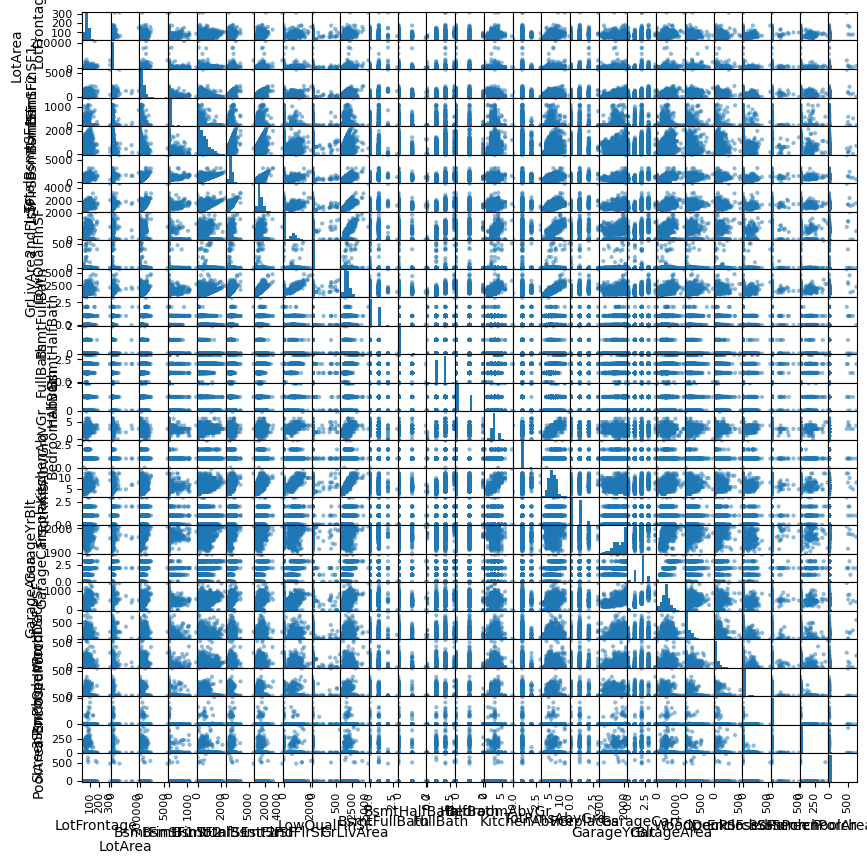

In [9]:
# use pd.plotting.scatter_matrix
pd.plotting.scatter_matrix(ames_preprocessed, figsize= [10,10])
plt.show()

The scatter matrix took a while to load and is hard to read. Run the code below to see if adjusting some of the visualization settings helps. 

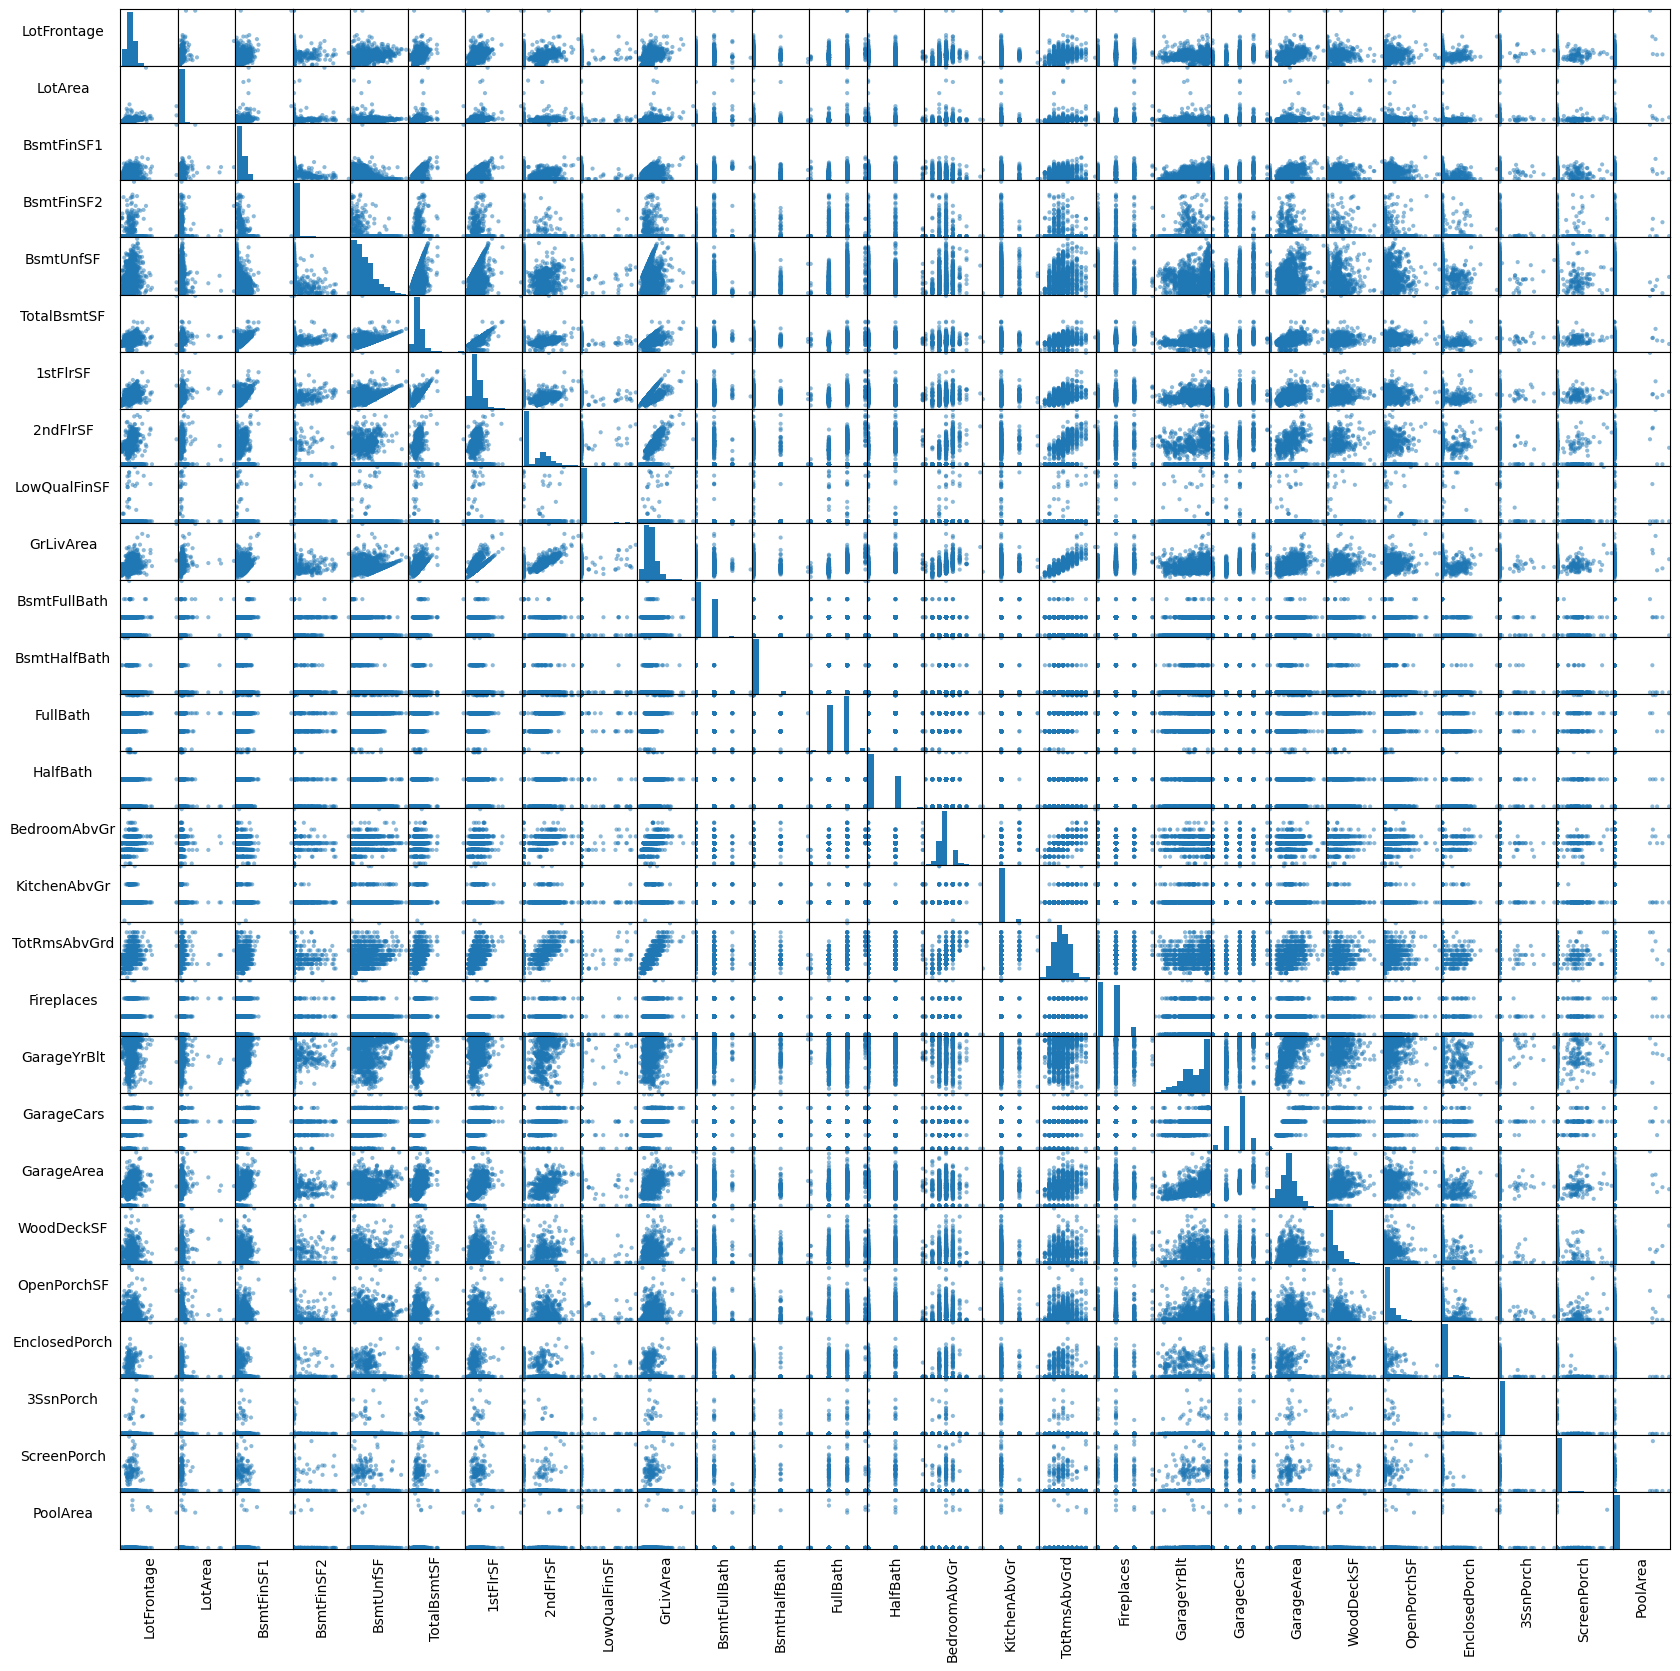

In [10]:
sm = pd.plotting.scatter_matrix(ames_preprocessed, figsize=[20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

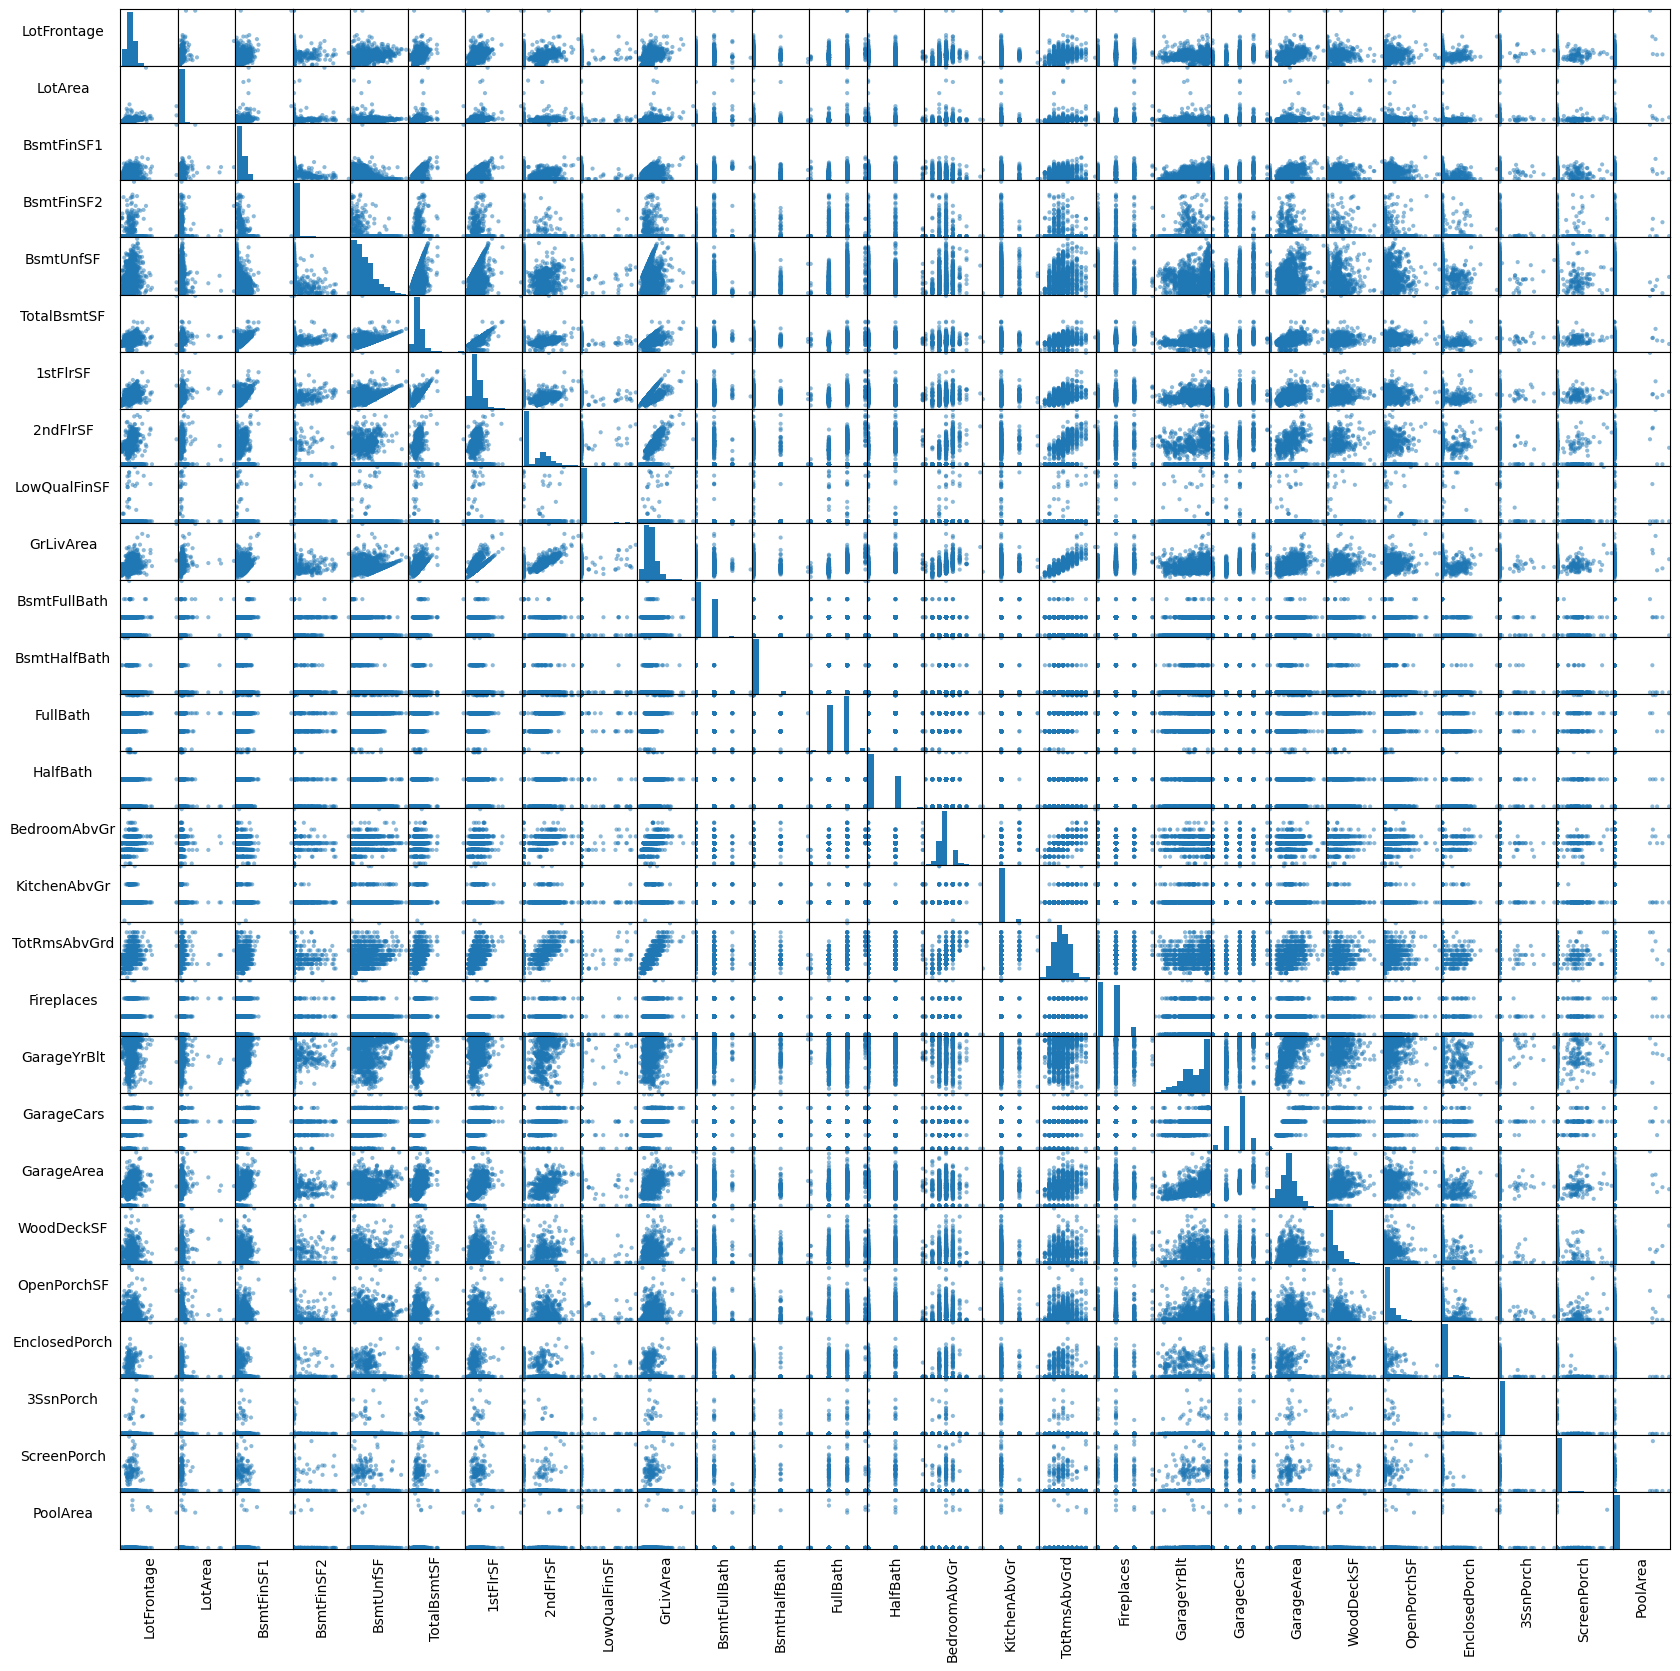

In [11]:
#__Solution__
sm = pd.plotting.scatter_matrix(ames_preprocessed, figsize=[20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

The enhanced plot demonstrates that with larger datasets, scatter matricies become less useful. Through careful examination of the matrix it's clear that `TotRmsAbvGrd` seems correlated with `GrLivArea`, but how easy to use would this matrix if a dataset has hundreds or thousands of variables? Also visual approach to finding correlation cannot be automated, so a numeric approach is a good next step.

## Correlation matrix

Next, create and look at the correlation matrix: 

In [15]:
corr = ames_preprocessed.corr()

Return `True` for positive or negative correlations that are bigger than 0.75 in the correlation matrix: 

In [16]:
abs(corr)>0.75

,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
LotFrontage,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
LotArea,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
BsmtFinSF1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
BsmtFinSF2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
BsmtUnfSF,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
TotalBsmtSF,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1stFlrSF,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2ndFlrSF,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
LowQualFinSF,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
GrLivArea,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


Now, include `stack` and `zip` to create a more robust solution that will return the variable pairs from the correlation matrix that have correlations over .75, but less than 1. 

In [21]:
df = corr.abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace=True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)
df[(df.cc > .75) & (df.cc < 1)]

,cc
pairs,
"(GarageArea, GarageCars)",0.882475
"(TotRmsAbvGrd, GrLivArea)",0.825489
"(1stFlrSF, TotalBsmtSF)",0.819530


Which varibles are highly correlated in the Ames Housing data set?

In [ ]:
# write answer here
"""
GaradgeArea
GaradgeCars
TotRmsAbvgrd
GrLivArea
1stFlrSF
TotalBsmrSF
"""

## Make a data decision

Now that you know which variables are correlated with eachother, which would you drop from the dataset?

In [ ]:
# write answer here

In [ ]:
#__SOLUTIOM__
"""
Since three different pairs of variables are highly correlated, the correct approach would be to drop one variable from each pair.

One approach would be to drop Garage Area, Total Rooms, and Total Basement Square Feet.

Garage Area: The size of the garage is dependent on how many cars are in it. If you wanted to still keep the information captured by Garage Area, you could create a new variable "Average space per car" before dropping Garage Area.
Total Rooms: There are other variables that count the number of kitchens, bathrooms, bedrooms, etc. 
Total Basement Square Feet: The first floor of a building is usually built upon the foundation, which contains the basement. To keep the information that there *is* a basement, you could create a variable "HasBasement", when TotalBsmtSF >0, before deleting the original variable. 
"""


## Address the colinearity

Remove the chosen variables from `ames_preprocessed`.

In [25]:
# write code here
ames_preprocessed.drop(columns=['GarageArea', 'TotRmsAbvGrd', 'TotalBsmtSF'], inplace=True)

/var/folders/nn/c72jlbfd30l7x6mg7pg588kc0000gn/T/ipykernel_6428/2732877392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_preprocessed.drop(columns=['GarageArea', 'TotRmsAbvGrd', 'TotalBsmtSF'], inplace=True)


## Summary
Good job! You got some hands-on practice creating and interpreting a scatter matrix and correlation matrix to identify if variables are collinear in the Ames Housing data set. You also edited the Ames Housing data set so highly correlated variables are removed.